<a href="https://colab.research.google.com/github/Stitaprajna/AllMyProjects/blob/main/Untitled21_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/Salary_Dataset_with_Extra_Features.csv')

In [ ]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [ ]:
df.shape

(22770, 8)

In [ ]:
df.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [ ]:
df.dtypes

Rating               float64
Company Name          object
Job Title             object
Salary                 int64
Salaries Reported      int64
Location              object
Employment Status     object
Job Roles             object
dtype: object

# Data Cleaning

In [ ]:
# Here we are trying to aggrigate the top parent Companies by employees.
df['Company Name'] = df['Company Name'].str.replace('Tata Consultancy Services','TCS')
df['Company Name'] = df['Company Name'].apply(lambda x: 'Infosys' if 'Infosys' in x else x)
df['Company Name'] = df['Company Name'].apply(lambda x: 'Accenture' if 'Accenture' in x else x)
df['Company Name'] = df['Company Name'].apply(lambda x:'Amazon' if 'Amazon' in x else x)
df['Company Name'] = df['Company Name'].apply(lambda x: 'HCL' if 'HCL' in x else x) 
df['Company Name'] = df['Company Name'].apply(lambda x: 'IBM' if 'IBM' in x else x)
df['Company Name'] = df['Company Name'].apply(lambda x: 'Google' if 'Google' in x else x)
df['Company Name'] = df['Company Name'].apply(lambda x: 'Cognizant' if 'Cognizant' in x else x)

In [ ]:
# Removing outliers from data
df = df[df['Company Name'] != '(no)name']
df = df[~df['Company Name'].isin(['-','....','Fresher'])]

In [ ]:
# Removing only numbers from company names
fdi = []
for i in df['Company Name']:
    if int(i.isnumeric()):
        fdi.append(i)
fdi = np.unique(fdi)

In [ ]:
fdi

array(['10', '17544', '1985', '2018', '660000', '700'], dtype='<U6')

In [ ]:
df = df[~df['Company Name'].isin(fdi)]

# Univariate Analysis

## 1.Company Name

In [ ]:
# Top 10 company names by employees
de = df['Company Name'].value_counts()
ddee = pd.DataFrame(de).head(11)      
ddee 

,Company Name
TCS,313
Infosys,208
Amazon,203
Cognizant,159
Accenture,152
IBM,135
HCL,132
Wipro,122
Capgemini,101
Microsoft,96


In [ ]:
len(df['Company Name'].unique())

11208

## 2.Job Title

In [ ]:
len(df['Job Title'].unique())

1076

In [ ]:
de1 = df['Job Title'].value_counts()
pd.DataFrame(de1).head()    # Top 5 Job Titles by counts

,Job Title
Software Development Engineer,2343
Android Developer,2027
Software Development Engineer (SDE),1604
Front End Developer,1404
Test Engineer,1308


## 3.Location

In [ ]:
# Name of differnt cities present in the dataset
df['Location'].unique()          

array(['Bangalore', 'Chennai', 'Hyderabad', 'New Delhi', 'Pune', 'Jaipur',
       'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai'], dtype=object)

In [ ]:
# Population of developers in different parts of India
d2 = df['Location'].value_counts()
pd.DataFrame(d2)

,Location
Bangalore,8227
Hyderabad,4431
New Delhi,4166
Chennai,2437
Pune,2127
Mumbai,746
Kolkata,177
Madhya Pradesh,155
Kerala,107
Jaipur,80


In [ ]:
f1 = []
f2 = []
for keys in d2.index:
    f1.append(keys)
    f2.append(d2[keys])


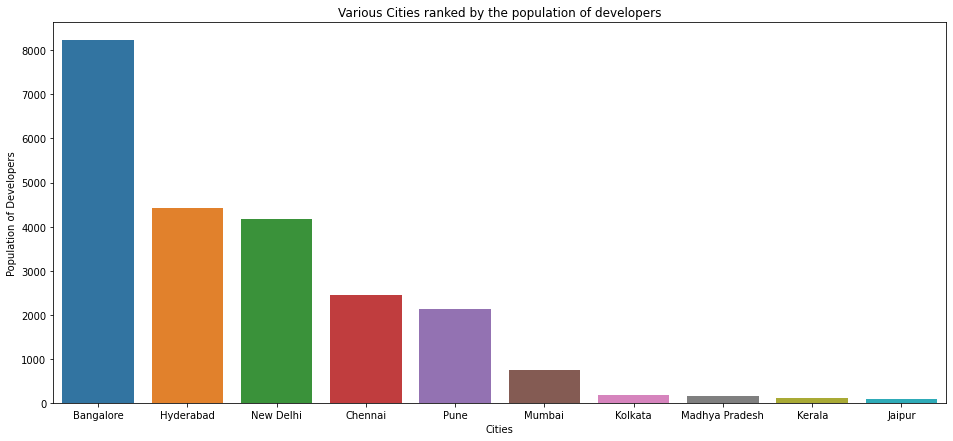

In [ ]:
sns.barplot(x=f1, y=f2)
plt.xlabel('Cities')
plt.ylabel('Population of Developers')
plt.title('Various Cities ranked by the population of developers')
plt.rcParams['figure.figsize'] = [12,7]
plt.show()

So, most of the developers live in Bangalore and least in Jaipur. The median salary of both might not show same trends.

## 4.Job Roles

In [ ]:
# Different Job Roles
df['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [ ]:
# Population of different Job roles
d1 = df['Job Roles'].value_counts()
pd.DataFrame(d1)

,Job Roles
SDE,8151
Android,2942
Frontend,2149
Java,1834
Testing,1734
IOS,1631
Backend,1190
Web,993
Python,922
Database,863


In [ ]:
D = []
D1 = []
for key in d1.index:
    D.append(key)
    D1.append(d1[key])

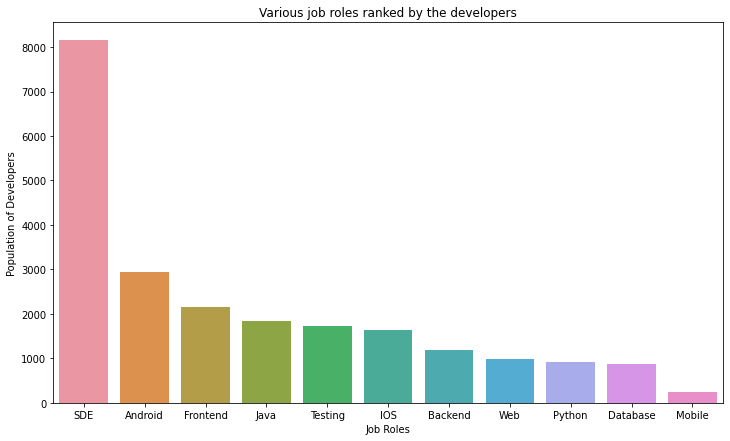

In [ ]:
sns.barplot(x=D, y=D1)
plt.rcParams['figure.figsize'] = [12,7]
plt.xlabel('Job Roles')
plt.ylabel('Population of Developers')
plt.title('Various job roles ranked by the developers')
plt.show()

So, most of the developers do SDE jobs. The salary of SDEs might show high sample variance, due to large sample size.

## 5.Salary

In [ ]:
d = df['Salary'].describe()
pd.DataFrame(d)

,Salary
count,2.265300e+04
mean,6.968073e+05
std,8.860057e+05
min,2.112000e+03
25%,3.000000e+05
50%,5.000000e+05
75%,9.000000e+05
max,9.000000e+07


As the Mean $>>$ Median, clearly this is a 'Right-Skewed' Distribution. This is not a very unexpected result, because the median salary of a very large population is mostly likely towards the lower side. 

In [ ]:
from scipy.stats import skew
print('Skewness is',skew(df['Salary']))

Skewness is 46.77595029608785


So, as the skewness $>> 1$, this confirms that its a 'Right-Skewed' distribution. Thus, we will use the 'Log-transformation' to transform the data. 

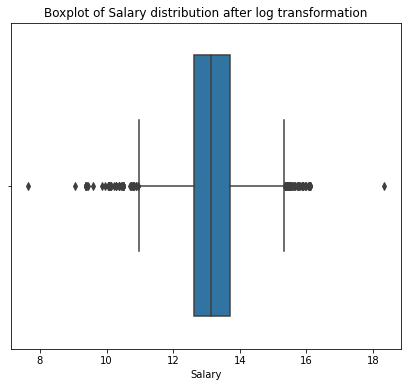

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.boxplot(np.log(df['Salary']))
plt.rcParams['figure.figsize'] = [7,5]
plt.title('Boxplot of Salary distribution after log transformation')
plt.show()


The boxplot shows how the 'log-transformation' made the distribution Normal.The outliers are both in left and right side of the median salary represented by the dots.

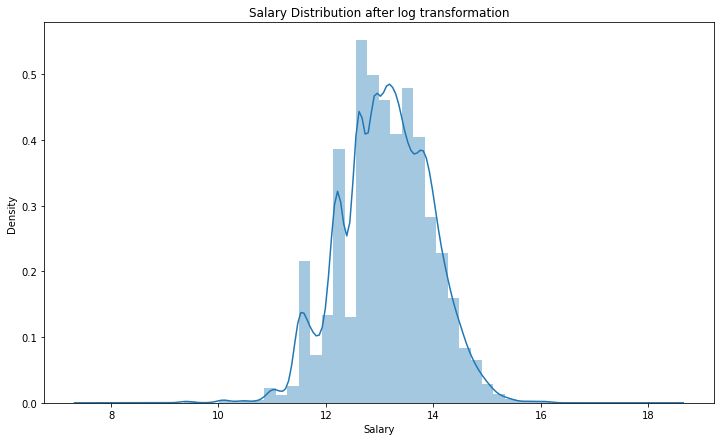

In [ ]:
sns.distplot(np.log(df['Salary']),kde=True)
plt.rcParams['figure.figsize'] = [12,7]
plt.title('Salary Distribution after log transformation')
plt.show()

This distribution is very close to Normal, and the skewness is also removed after the transformation. Thus, we can use this distribution for 'Hypothesis Testing'.

## 6.Rating

In [ ]:
d = df['Rating'].describe()
pd.DataFrame(d)

,Rating
count,22653.000000
mean,3.917124
std,0.520700
min,1.000000
25%,3.700000
50%,3.900000
75%,4.200000
max,5.000000


In [ ]:
print('Skewness is',skew(df['Rating']),', so its a Negetive-Skewed distribution.')

Skewness is -1.0080950998038918 , so its a Negetive-Skewed distribution.


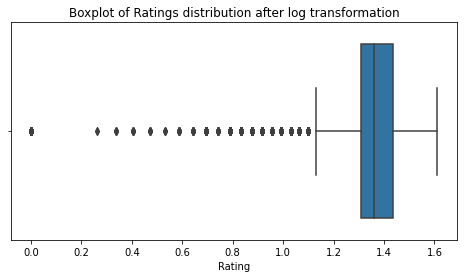

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(np.log(df['Rating']))
plt.rcParams['figure.figsize'] = [7,5]
plt.title('Boxplot of Ratings distribution after log transformation')
plt.show()

The boxplot shows how the 'Rating' is balanced and the outliers are present in the left-side of the median.

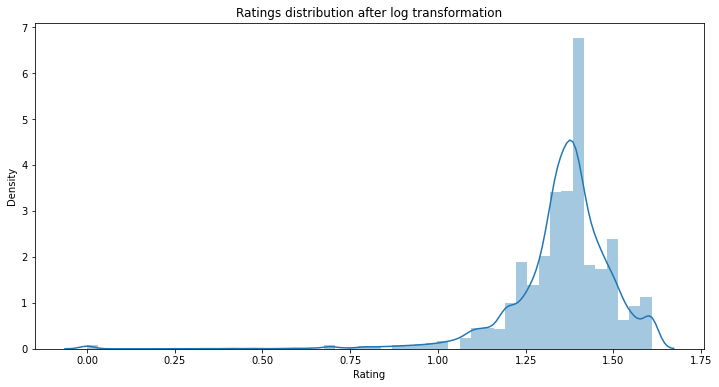

In [ ]:
sns.distplot(np.log(df['Rating']))
plt.rcParams['figure.figsize'] = [12,6]
plt.title('Ratings distribution after log transformation')
plt.show()

Thus, the distribution is almost Normal if we ignore the left tail, which consists of only a fraction of the data. Thus, it will follow all the assumptions of a Normal Distribution and can be used for 'Hypothesis Testing'.

## 7.Salaries Reported

In [ ]:
df['Salaries Reported'].unique()

array([  3,   2,   1,   5,   4,   6,   8,  11,   9,  30,  19,  35,  17,
         7,  43,  24,  21,  15,  14,  13,  12,  10,  26,  29,  18,  16,
        84,  38,  36,  20, 291,  23, 353,  40,  60, 162,  68,  33,  45,
        73, 135, 100,  22,  75,  37,  34,  65, 115,  28, 186,  41,  31,
       188, 149,  77,  76,  52,  39,  83,  25, 361,  42, 280,  74,  44,
       331,  70,  50,  48, 263, 116, 106, 103,  98,  91,  80,  71,  64,
        51,  46,  32,  27])

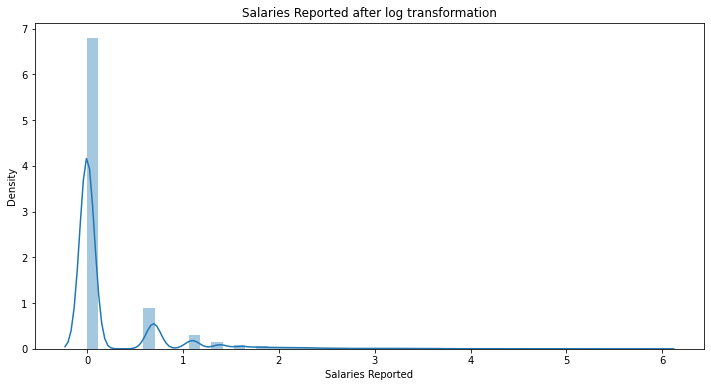

In [ ]:
sns.distplot(np.log(df['Salaries Reported']))
plt.title('Salaries Reported after log transformation')
plt.rcParams['figure.figsize'] = [12,6]

Even after 'log-transformation' this distribution is not very close to Normal, so we can't use it for 'Hypothesis Testing'. 

## 8.Employment Status

In [ ]:
Dt = df['Employment Status'].value_counts()
pd.DataFrame(Dt)

,Employment Status
Full Time,19983
Intern,2090
Contractor,548
Trainee,32


In [ ]:
f00 = []
f01 = []
for keys in Dt.index:
    f00.append(keys)
    f01.append(Dt[keys])

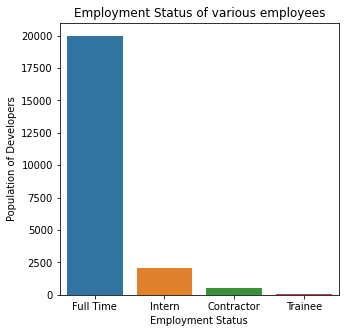

In [ ]:
sns.barplot(x=f00, y=f01)
plt.rcParams['figure.figsize'] = [5,5]
plt.xlabel('Employment Status')
plt.ylabel('Population of Developers')
plt.title('Employment Status of various employees')
plt.show()

So, most of the employees are Full Time and the others are mostly interns. The salary of Full Time employees might higher than the rest. 

# Hypothesis

Here are below the list of 'Hypothesis' that we have built, and lets prove them one-by-one in the following order as: 

### $1^{st}$ Hypothesis : Most of the SDEs live in Bangalore.


###   $2^{nd}$ Hypothesis :  Among the cities, developers living in Jaipur have the lowest income.

###  $3^{rd}$ Hypothesis : Developers using Java in roles have higher salary than Python. 

###  $4^{th}$ Hypothesis : Microsoft developers living in Hyderabad get more salary than Bangalore.

### ***Note:
As, we saw in the previous section that continuous features of the data is skewed. Thus, we have do a transformation to make them Normal. This is required because for 'Hypothesis testing', we assume that our distribtion is Normal. Thus, we will do a 'Log-transformation' to make it normal and use this data for further analysis. We will also assume that the samples used for comparisons are independent of each other.

### Common terms used:
$H_0 = $ Null Hypothesis, $H_A = $  Alternate Hypothesis, $\alpha = $ Significance Level, $\sigma = $ Standard Deviation 

# $1^{st}$ Hypothesis 

### Statement : Most of the SDEs live in Bangalore.  

### Aim:
 We have get the numbers in each region of India and then compare them. The numbers are single values here, so no chance of getting a distribution.

In [ ]:
D_sde = df[df['Job Roles'] == 'SDE']

In [ ]:
D_s = D_sde['Location'].value_counts()
D_ss = pd.DataFrame(D_s)
D_ss.rename(columns={'Location':'Counts'})

,Counts
Bangalore,1981
New Delhi,1691
Hyderabad,1479
Pune,1070
Mumbai,744
Chennai,668
Kolkata,176
Madhya Pradesh,155
Kerala,107
Jaipur,80


In [ ]:
D_e = []
D_f = []
for key in D_s.index:
    D_e.append(key)
    D_f.append(D_s[key])

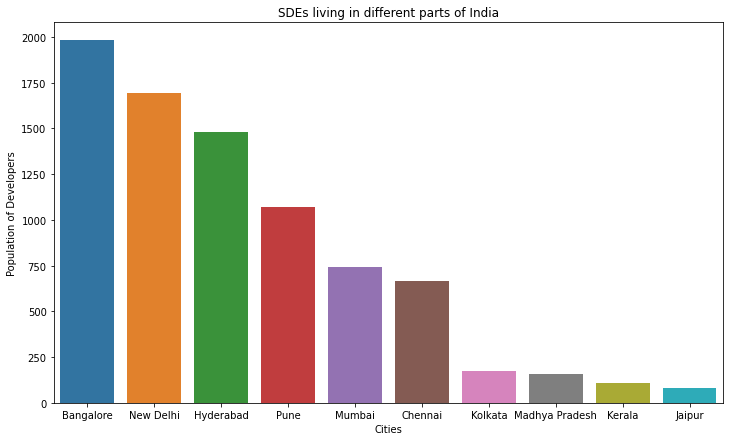

In [ ]:
sns.barplot(x=D_e, y=D_f)
plt.rcParams['figure.figsize'] = [12,7]
plt.title('SDEs living in different parts of India')
plt.xlabel('Cities')
plt.ylabel('Population of Developers')
plt.show()

### Result:
### So, clearly SDEs are mostly populated in Bangalore. And, as because the counts of developers don't form a distribution, so we can't do a 'Hypothesis Testing' here. With enough evidence from the 'Bar Plot', we can accept the hypothesis.

# $2^{nd}$ Hypothesis 

 ### Statement: Among the cities, developers living in Jaipur have the lowest income.

In [ ]:
DF = df.copy()
DF['Salary'] = np.log(DF['Salary'])

## One-way Anova test 

$H_0$ : The Mean salaries of the developers living in differnt parts of India is same.

$H_A$ : Then Mean salaries of the developers living in different parts of India vary.

$\alpha = 0.05$

### Aim:
 So, to find out whether we can reject the null hypothesis, we have to compare the mean salaries of each of the cities. Lets try a 'One-way ANOVA test'. In ANOVA-test, we assume that sample variances ($\sigma^2$) is the same. Lets do the ANOVA-test and at the last we will find out whether our assumption holds on.

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

In [ ]:
model = smf.ols('Salary ~ C(Location)', data=DF).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Location),178.207233,9.0,29.108704,5.996131e-51
Residual,15402.595839,22643.0,NaN,NaN


### As, the p-value is of the order $10^{-52} << \alpha$, thus the sample has a 'Statistical Significance'. Thus, we reject the null hypothesis and conclude that the mean salaries of people living across in different parts of India varies. Now, our task is to find out how mean salary in 'Jaipur' varies with other parts. For that we will do a 'Tukey test'.

## Tukey test for pairwise mean difference

Tukey test will determine the pairwise difference between the Mean Salaries of various regions of India. It will also give signification level. We will especially look at the differences in means with respect to 'Jaipur'. If we get the mean differnce positive in any observation, then we can conclude that our hypothesis holds.

In [ ]:
import statsmodels.stats.multicomp as multi

In [ ]:
result = multi.MultiComparison(np.log(df['Salary']), df['Location'])
results = result.tukeyhsd()
print(results)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
     Bangalore        Chennai  -0.1834  0.001 -0.2436 -0.1232   True
     Bangalore      Hyderabad   -0.061 0.0029 -0.1096 -0.0124   True
     Bangalore         Jaipur  -0.0717    0.9 -0.3649  0.2215  False
     Bangalore         Kerala  -0.1619 0.5743 -0.4158   0.092  False
     Bangalore        Kolkata  -0.1034 0.8003 -0.3016  0.0949  False
     Bangalore Madhya Pradesh  -0.1698 0.2475 -0.3814  0.0418  False
     Bangalore         Mumbai   0.3052  0.001  0.2055   0.405   True
     Bangalore      New Delhi  -0.1103  0.001 -0.1599 -0.0607   True
     Bangalore           Pune  -0.0627 0.0561 -0.1262  0.0008  False
       Chennai      Hyderabad   0.1224  0.001  0.0566  0.1882   True
       Chennai         Jaipur   0.1117    0.9 -0.1848  0.4083  False
       Chennai         Kerala   0.

Actually, here the 'meandiff' is being found by (group2 - group1). Now, if we carefully look at the above table, we can find
many negetive values of meandiff where Jaipur is in 'group1'. That clearly states that mean salary of developers in Jaipur is not the lowest. Next, we will check the validity of our assumption.

## Checking the Validity of equal $\sigma^2$ in ANOVA by Levene Test

In [ ]:
d_ba = DF[DF['Location'] == 'Bangalore'].Salary
d_ch = DF[DF['Location'] == 'Chennai'].Salary
d_hy = DF[DF['Location'] == 'Hyderabad'].Salary
d_nd = DF[DF['Location'] == 'New Delhi'].Salary
d_pu = DF[DF['Location'] == 'Pune'].Salary
d_jp = DF[DF['Location'] == 'Jaipur'].Salary
d_ke = DF[DF['Location'] == 'Kerala'].Salary
d_ko = DF[DF['Location'] == 'Kolkata'].Salary
d_mp = DF[DF['Location'] == 'Madhya Pradesh'].Salary
d_mu = DF[DF['Location'] == 'Mumbai'].Salary

In [ ]:
import scipy.stats as stats
statistic, pvalue = stats.levene(d_ba,d_ch,d_hy,d_nd,d_pu,d_jp,d_ke,d_ko,d_mp,d_mu)
print('statistic =',statistic)
print('p-value =', pvalue)

statistic = 6.153443135585623
p-value = 1.0574497199476448e-08


As, the p-value $<< \alpha$, that means the equal variance ($\sigma^2$) assumption is not correct. Thus, unfortunately the ANOVA test fails. This might be because the salary distributions across different parts of India should have unequal variances. Let's look at the actual data and see what we get.

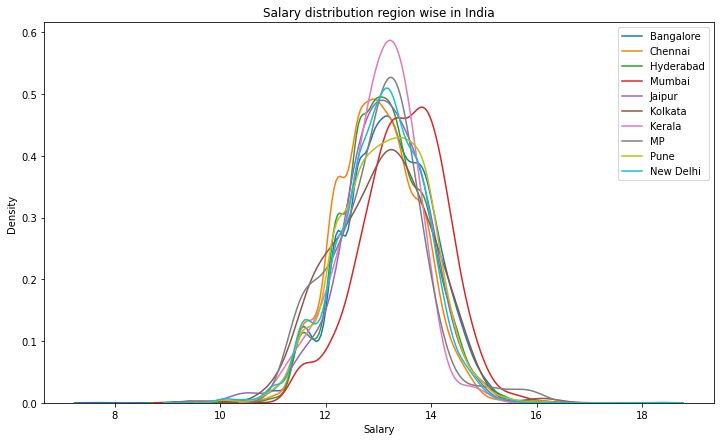

In [ ]:
sns.distplot(d_ba, label='Bangalore',hist=False)
sns.distplot(d_ch,label='Chennai', hist=False)
sns.distplot(d_hy,label='Hyderabad', hist=False)
sns.distplot(d_mu,label='Mumbai', hist=False)
sns.distplot(d_jp,label='Jaipur' ,hist=False)
sns.distplot(d_ko,label='Kolkata', hist=False)
sns.distplot(d_ke,label='Kerala' ,hist=False)
sns.distplot(d_mp,label='MP' ,hist=False)
sns.distplot(d_pu,label='Pune' ,hist=False)
sns.distplot(d_nd,label='New Delhi' ,hist=False)
plt.legend()
plt.title('Salary distribution region wise in India')
plt.rcParams['figure.figsize'] = [15,8]
plt.show()

The Standard Deviation ($\sigma$) as predicted by the 'Levene Test' is different for many cities. This is the reason why the ANOVA test failed. The diffrence in median salaries can be better visualized using a box-plot and lets do that next.

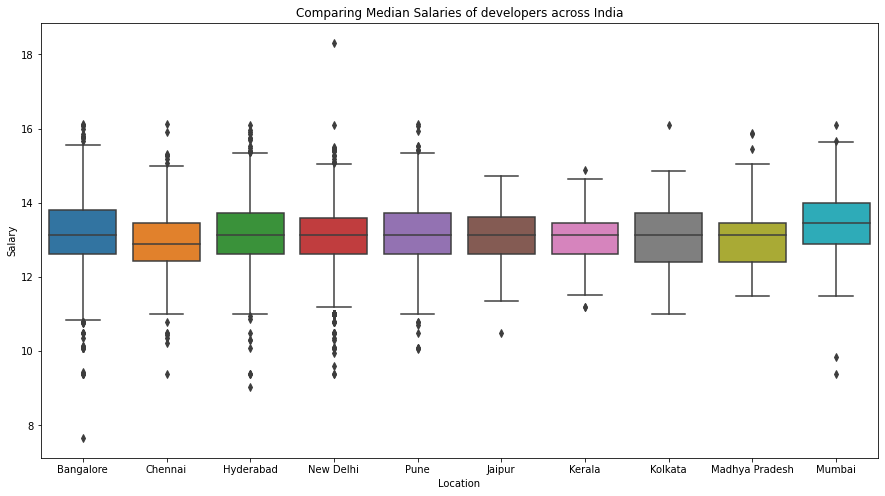

In [ ]:
sns.boxplot(y='Salary', x='Location', data=DF)
plt.rcParams['figure.figsize'] = [15,8]
plt.title('Comparing Median Salaries of developers across India')
plt.show()

### Result:
### Finally, we conclude that although the number of developers in  'Jaipur'  are less, but the median Salary of people is not the lowest. Infact the median salary of 'Jaipur' is close to that of Bangalore. So, we reject this hypothesis. 

# $3^{rd}$ Hypothesis 

### Statement: The Java developers have higher salary as compared to the Python.



In [ ]:
D12 = DF[DF['Job Roles'].isin(['Java','Python'])]

In [ ]:
r1 = D12[D12['Job Roles']=='Java'].Salary.describe()
pd.DataFrame(r1)

,Salary
count,1834.000000
mean,12.942229
std,0.754228
min,9.041685
25%,12.448814
50%,12.899220
75%,13.458836
max,16.118096


In [ ]:
r2 = D12[D12['Job Roles']=='Python'].Salary.describe()
pd.DataFrame(r2)

,Salary
count,922.000000
mean,12.851564
std,0.712488
min,10.085809
25%,12.388394
50%,12.899220
75%,13.304685
max,15.747032


## Two-Sampled Z-Test

$H_{0}$ : The Java developers have similar salary as compared to the Python.

$H_{A}$ : The Java developers have different salary as compared to the Python.

$\alpha = 0.05$  

### Aim:
Here, we have $2$ samples, so to compare their mean, we will do a '2-Sample Z-Test'. As, the sample is large, so 'Z-test' will be a good test statistic. If we get the p-value lower that $\alpha$, then the effect is real and the result is statistically significant.

In [ ]:
numbers = np.array([1858, 947])
SalarySum = np.array([12.938991,12.842961])

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
Z_value, p_value = proportions_ztest(SalarySum,numbers)
print('Z-score = ', Z_value)
print('p-value = ', p_value)

Z-score =  -1.731586061450352
p-value =  0.08334728970277286



### The p-value is about $0.0833 > \alpha$, so we can't reject the null hypothesis. That means the developers using Java in roles have similar salary as that of Python'. Next, lets look at the distributions of both of them.

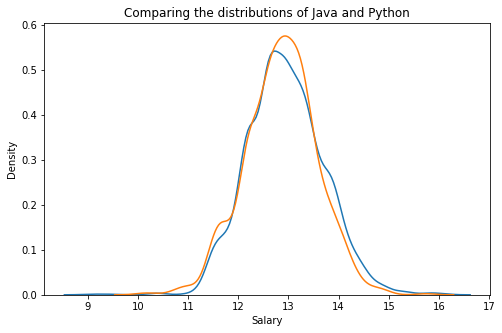

In [ ]:
sns.distplot(D12[D12['Job Roles']=='Java'].Salary, label='Java' ,hist=False)
sns.distplot(D12[D12['Job Roles']=='Python'].Salary, label='Python' ,hist=False)
plt.rcParams['figure.figsize'] = [8,5]
plt.title('Comparing the distributions of Java and Python')
plt.show()

### Result:
### We reject the hypothesis that the Java developers have higher salary as compared to the Python. Just the number of people doing Java development is more than Python. The above plot supports this.

# $4^{th}$ Hypothesis

### Statement: Microsoft developers living in Hyderabad get more salary than Bangalore.



In [ ]:
D13 = DF[DF['Location'].isin(['Bangalore','Hyderabad'])] 
D33 = D13[D13['Company Name']=='Microsoft']
x11 = D33[D33['Location']=='Bangalore'].Salary
x12 = D33[D33['Location']=='Hyderabad'].Salary

In [ ]:
d_112 = x12.describe()
dddd = pd.DataFrame(d_112)
dddd.rename(columns={'Salary': 'Hyderabad (Salary)'})

,Hyderabad (Salary)
count,47.000000
mean,13.930937
std,1.078638
min,9.392662
25%,13.570704
50%,14.151983
75%,14.603968
max,15.201805


In [ ]:
d_113 = x11.describe()
ddd = pd.DataFrame(d_113)
ddd.rename(columns={'Salary': 'Bangalore (Salary)'})

,Bangalore (Salary)
count,20.000000
mean,13.911496
std,0.778606
min,11.512925
25%,13.777073
50%,13.994348
75%,14.353498
max,15.009433


## Two-Sampled Z-Test

$H_0$ : Employees working in Microsoft are equally paid in Hyderabad and Bangalore.

$H_A$ : Microsoft employees working in Hyderabad as paid differently than that of Bangalore.

$\alpha = 0.05$ 

### Aim:
Here, we will again do a 'Two-Sample Z-Test', but to convince oureself we will also do a 'Two-Sample t-Test'. This is because as the sample size is small, and $\geq$ 20, so we must try both.


In [ ]:
nods = np.array([47,20])
total_salary = np.array([13.930937,13.911496])

In [ ]:
z_score, p_value = proportions_ztest(total_salary,nods)
print('The z-score is',z_score)
print('The p-value is', p_value)

The z-score is -3.0338900083814746
The p-value is 0.0024142243307232326


## Two-Sampled t-Test**

In [ ]:
from scipy.stats import ttest_ind
z_score, p_value = ttest_ind(total_salary,nods)
print('The z-score is',z_score)
print('The p-value is', p_value)

The z-score is -1.450279883308087
The p-value is 0.28404691204022814



### The p-value for 'Z-Test' is around $0.0024 < \alpha $, that means the result has 'Statistical Significance'. So, we have enough evidence to reject the null hypothesis. That means the mean salary of Microsoft employees for the Hyderabad and Bangalore are different. But, the 't-Test' gives the opposite result, thus lets compare it with the actual data.

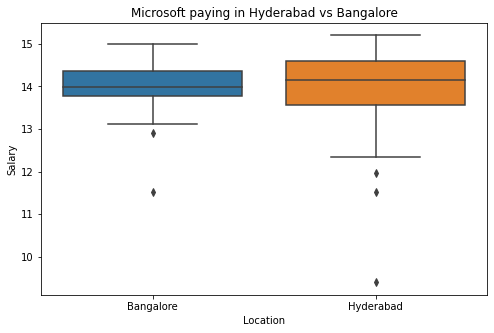

In [ ]:
sns.boxplot(x ='Location', y='Salary', data=D33)
plt.rcParams['figure.figsize'] = [8,5]
plt.title('Microsoft paying in Hyderabad vs Bangalore')
plt.show()

The box-plot clearly shows that the median salary of Microsoft employees in Hyderabad is more than that of Bangalore. This, is what the 'Two-Sample Z-Test' predicted. Thus, the results predicted by the 't-Test' is not correct. Lets next look at how the distributions look at such less sample size.

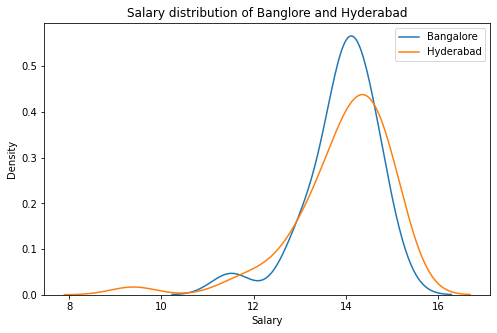

In [ ]:
sns.distplot(x11, label='Bangalore', hist=False)
sns.distplot(x12, label='Hyderabad', hist=False)
plt.rcParams['figure.figsize'] = [8,5]
plt.title('Salary distribution of Banglore and Hyderabad')
plt.legend()
plt.show()

### Result:
### We, accept the hypothesis that the Microsoft employees living in Hyderabad are being paid more than Bangalore. Although, the sample size is small but still it distributions are Normal, and 'Z-Test' holds well.

# Pearson's Correlation Coefficient Matrix

The Pearson's Correlation Coefficient only reflects the 'Linear' relationship between the two continuous variables. Here, in this dataframe we have only three such features that are continuous namely: Salary, Rating and Salary reported. Lets find out the correlation coeffcient matrices of three such combinations.

## 1.Salary vs Rating

In [ ]:
np.corrcoef(np.log(df['Salary']),np.log(df['Rating']))

array([[1.        , 0.04779641],
       [0.04779641, 1.        ]])

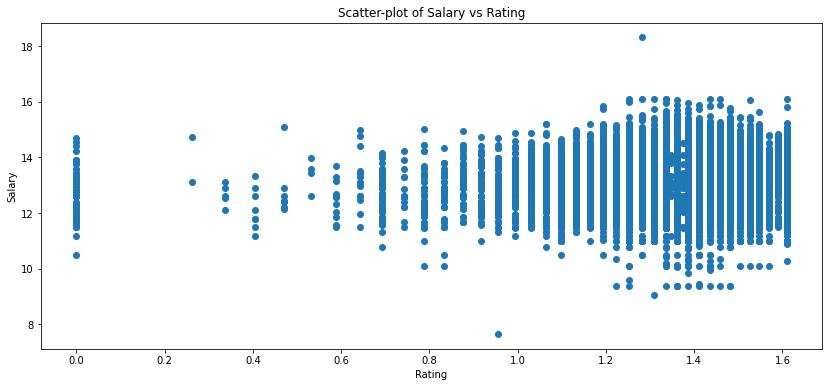

In [ ]:
plt.scatter(np.log(df['Rating']),np.log(df['Salary']))
plt.rcParams['figure.figsize'] = [14,6]
plt.xlabel('Rating')
plt.ylabel('Salary')
plt.title('Scatter-plot of Salary vs Rating')
plt.show()

### Conclusion:
As, correlation coefficient is very low, thus it does not show any linear relationship. For some regions its linear up and others its linear down. In some regions it shows how the 'Salary' increases by keeping the 'Rating' constant and vice versa. Thus, in total there is no significant correlation. 

## 2.Salary vs Salaries Reported

In [ ]:
np.corrcoef(np.log(df['Salary']),np.log(df['Salaries Reported']))

array([[ 1.        , -0.01852447],
       [-0.01852447,  1.        ]])

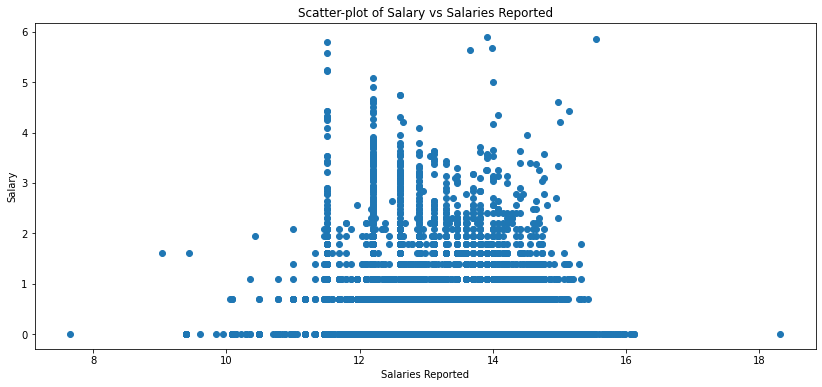

In [ ]:
plt.scatter(np.log(df['Salary']),np.log(df['Salaries Reported']))
plt.rcParams['figure.figsize'] = [14,6]
plt.xlabel('Salaries Reported')
plt.ylabel('Salary')
plt.title('Scatter-plot of Salary vs Salaries Reported')
plt.show()

### Conclusion:
Here the Correlation Coefficient is negetive but very small, so there is no linear behaviour between them. By looking at the plot, we can see in many case when 'salary Reported' increases keeping the 'Salary' constant and vice-versa. This also supports the idea that they don't have much coreelation. 

## 3.Rating vs Salaries Reported

In [ ]:
np.corrcoef(np.log(df['Rating']),np.log(df['Salaries Reported']))

array([[1.        , 0.02091221],
       [0.02091221, 1.        ]])

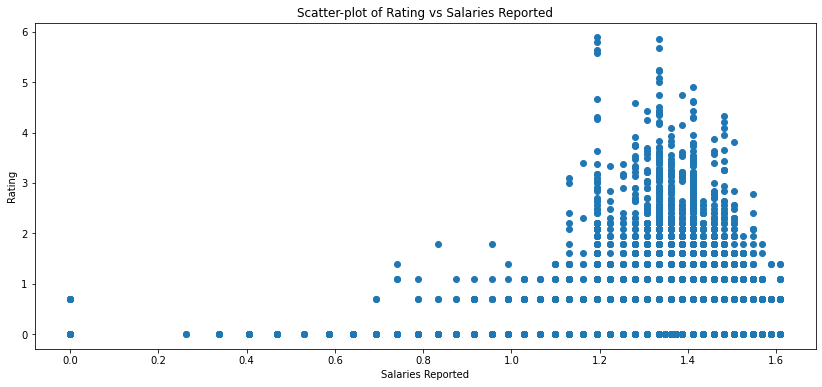

In [ ]:
plt.scatter(np.log(df['Rating']),np.log(df['Salaries Reported']))
plt.rcParams['figure.figsize'] = [14,6]
plt.xlabel('Salaries Reported')
plt.ylabel('Rating')
plt.title('Scatter-plot of Rating vs Salaries Reported')
plt.show()

### Conclusion:
Here, the Correlation Coefficient is positive but very small, thus no linear trend is expected. This is also reflected in the scatter-plot, as when the 'Rating' increases, the 'Salaries Reported' remains same and vice versa. 

# Some extra insights

## Location

In [ ]:
tyt1 = df[df['Location'].isin(['Bangalore'])].Salary.describe()
pd.DataFrame(tyt1)

,Salary
count,8.227000e+03
mean,7.365826e+05
std,6.846221e+05
min,2.112000e+03
25%,3.000000e+05
50%,5.000000e+05
75%,1.000000e+06
max,1.000000e+07


In [ ]:
tyt2 = df[df['Location'].isin(['Mumbai'])].Salary.describe()
pd.DataFrame(tyt2)

,Salary
count,7.460000e+02
mean,9.616945e+05
std,8.456556e+05
min,1.200000e+04
25%,4.000000e+05
50%,7.040000e+05
75%,1.200000e+06
max,9.800000e+06


In [ ]:
tyt3 = df[df['Location'].isin(['Jaipur'])].Salary.describe()
pd.DataFrame(tyt3)

,Salary
count,8.000000e+01
mean,6.347500e+05
std,4.758409e+05
min,3.600000e+04
25%,3.000000e+05
50%,5.000000e+05
75%,8.250000e+05
max,2.500000e+06


In [ ]:
tyt4 = df[df['Location'].isin(['Chennai'])].Salary.describe()
pd.DataFrame(tyt4)

,Salary
count,2.437000e+03
mean,5.871857e+05
std,5.450216e+05
min,1.200000e+04
25%,2.520000e+05
50%,4.000000e+05
75%,7.000000e+05
max,1.000000e+07


 ### Region Wise insights:
 
1. Most of the developers live in Bangalore and with a median salary of 5 LPA.
2.  Mumbai is the city with the highest median salary of 7 LPA.
3. Jaipur is the place where least developers leave with also a median salary of 5 LPA.
4. Chennai is the place with the lowest median salary of 4 LPA.


## Job Roles

In [ ]:
tyt5 = df[df['Job Roles'].isin(['SDE'])].Salary.describe()
pd.DataFrame(tyt5)

,Salary
count,8.151000e+03
mean,8.551023e+05
std,1.234722e+06
min,1.200000e+04
25%,3.870000e+05
50%,6.720000e+05
75%,1.100000e+06
max,9.000000e+07


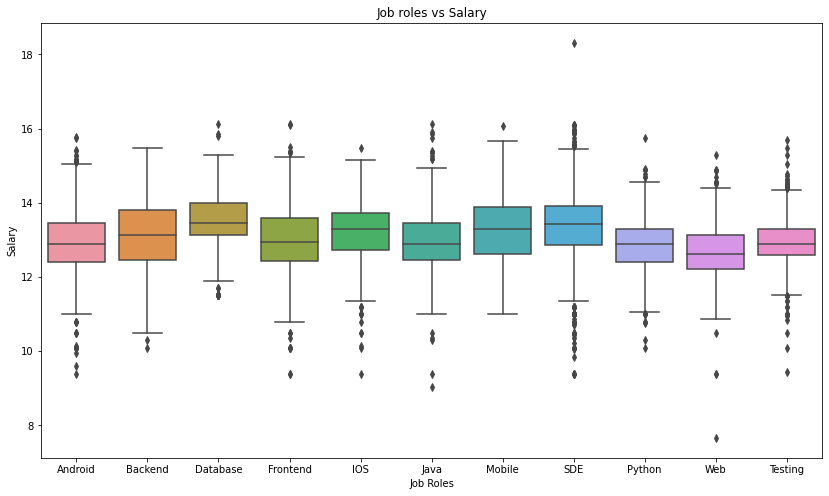

In [ ]:
sns.boxplot(x='Job Roles',y='Salary',data=DF)
plt.rcParams['figure.figsize'] = [14,8]
plt.title('Job roles vs Salary')
plt.show()

In [ ]:
tyt6 = df[df['Job Roles'].isin(['Database'])].Salary.describe()
pd.DataFrame(tyt6)

,Salary
count,8.630000e+02
mean,9.596468e+05
std,8.158439e+05
min,1.000000e+05
25%,5.000000e+05
50%,7.000000e+05
75%,1.200000e+06
max,1.000000e+07


In [ ]:
tyt7 = df[df['Job Roles'].isin(['Backend'])].Salary.describe()
pd.DataFrame(tyt7)

,Salary
count,1.190000e+03
mean,7.494241e+05
std,7.286335e+05
min,2.400000e+04
25%,2.550000e+05
50%,5.000000e+05
75%,1.000000e+06
max,5.200000e+06


In [ ]:
tyt8 = df[df['Job Roles'].isin(['Web'])].Salary.describe()
pd.DataFrame(tyt8)

,Salary
count,9.930000e+02
mean,4.164758e+05
std,3.598394e+05
min,2.112000e+03
25%,2.000000e+05
50%,3.000000e+05
75%,5.000000e+05
max,4.400000e+06


### Job Roles wise insights:
1. Developers working on Database have the highest median salary of 7 LPA, with the least variance. They are among the most highly paid developers.
2. Most of the developers work as SDEs with a median salary of 6.7 LPA, which is also the 2nd highest salary.
3. Backend developers have quite spread salary distribution, this also the situation for Mobile developers.
4. Web developers have the lowest median salary of 3 LPA.

## Company

In [ ]:
tyt9 = df[df['Company Name'].isin(['TCS'])].Salary.describe()
pd.DataFrame(tyt9)

,Salary
count,3.130000e+02
mean,5.023035e+05
std,5.457402e+05
min,2.400000e+04
25%,2.880000e+05
50%,4.000000e+05
75%,6.000000e+05
max,8.000000e+06


In [ ]:
ddee.index

Index(['TCS', 'Infosys', 'Amazon', 'Cognizant', 'Accenture', 'IBM', 'HCL',
       'Wipro', 'Capgemini', 'Microsoft', 'Google'],
      dtype='object')

In [ ]:
DFi = DF[DF['Company Name'].isin(ddee.index)]

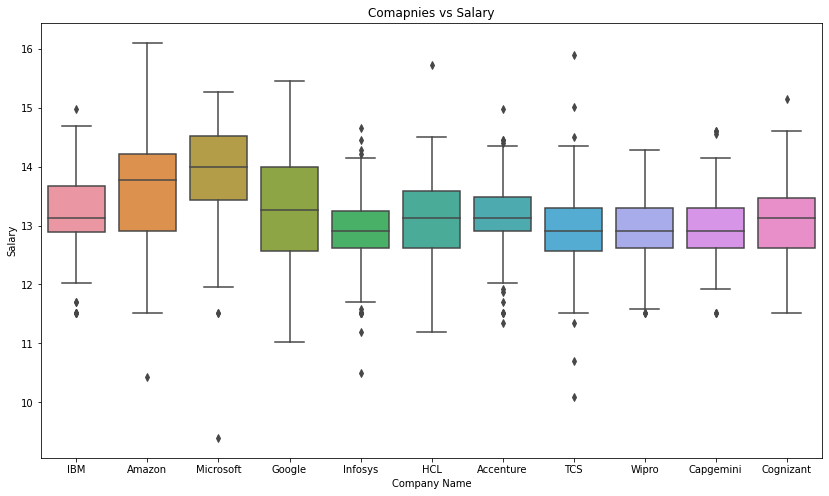

In [ ]:
sns.boxplot(x='Company Name', y='Salary', data=DFi)
plt.rcParams['figure.figsize'] = [16,7]
plt.title('Comapnies vs Salary')
plt.show()

In [ ]:
tyt10 = df[df['Company Name'].isin(['Microsoft'])].Salary.describe()
pd.DataFrame(tyt10)

,Salary
count,9.600000e+01
mean,1.444882e+06
std,9.745901e+05
min,1.200000e+04
25%,6.810000e+05
50%,1.200000e+06
75%,2.025000e+06
max,4.300000e+06


In [ ]:
tyt11 = df[df['Company Name'].isin(['Amazon'])].Salary.describe()
pd.DataFrame(tyt11)

,Salary
count,2.030000e+02
mean,1.189699e+06
std,1.187718e+06
min,3.379200e+04
25%,4.000000e+05
50%,9.600000e+05
75%,1.500000e+06
max,9.850000e+06


In [ ]:
tyt12 = df[df['Company Name'].isin(['Google'])].Salary.describe()
pd.DataFrame(tyt12)

,Salary
count,8.500000e+01
mean,9.111531e+05
std,9.231722e+05
min,6.124800e+04
25%,2.880000e+05
50%,5.760000e+05
75%,1.200000e+06
max,5.100000e+06


In [ ]:
tyt13 = df[df['Company Name'].isin(['Capgemini'])].Salary.describe()
pd.DataFrame(tyt13)

,Salary
count,1.010000e+02
mean,5.279010e+05
std,4.074538e+05
min,1.000000e+05
25%,3.000000e+05
50%,4.000000e+05
75%,6.000000e+05
max,2.200000e+06


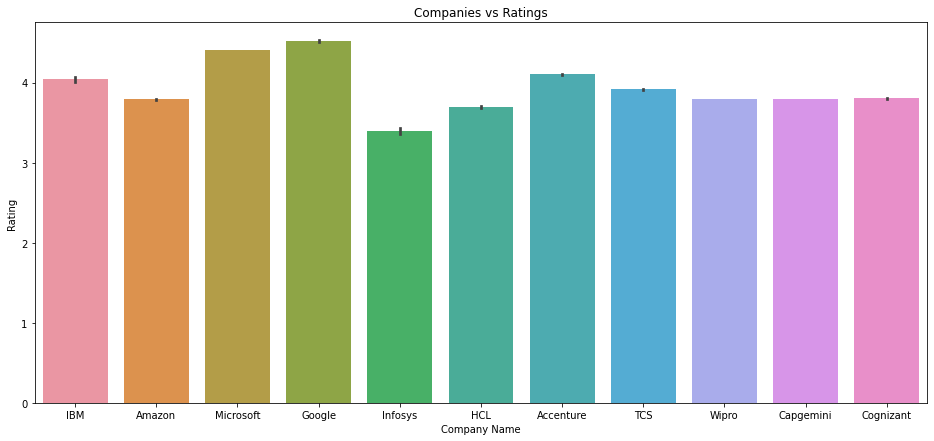

In [ ]:
sns.barplot(x='Company Name', y='Rating', data=DFi)
plt.title('Companies vs Ratings')
plt.show()

### Company wise insights:
1. TCS has the most number of employees with a median salary of 4 LPA.
2. Developers working in Microsoft have the highest median salary of 12 LPA, followed by Amazon and Google with a median salary of 9.6 LPA and 5.8 LPA.
3. Developers working in TCS, Infosys, Wipro and Capgemini all have the lowest median salary of 4 LPA.
4. Employees of Microsoft and Google have higher ratings than other companies. Infosys employees have the lowest ratings.